# Parasite Chain Building

Here I'm going to try and build a parasite chain attack, with only a specific transaction for this first version. A more comprehensive version with adaptability can be developed later.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng)
for n in range(4):
    ng.new_node()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000237FFE6D520>]
Edges []
Node IDS [0]
Weights [[0, 719, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000237FFE6D520>, <tangle.node object at 0x00000237FFF294F0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 719, 1], [1, 540, 2]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000237FFE6D520>, <tangle.node object at 0x00000237FFF294F0>, <tangle.node object at 0x00000237971DD7F0>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 719, 1], [1, 540, 2], [2, 1352, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000237FFE6D520>, <tangle.node object at 0x00000237FFF294F0>, <tangle.node object at 0x00000237971DD7F0>, <tangle.node object at 0x0000023796132FC0>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 719, 1], [1, 540, 2], [2, 1352, 1], [3, 88, 3]]


Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000237FFE6D520>, <tangle.node object at 0x00000237FFF294F0>, <tangle.node object at 0x00000237971DD7F0>, <tangle.node object at 0x0000023796132FC0>, <tangle.mal_node object at 0x00000237FFB09D00>]
Edges [(1, 0), (2, 0), (2, 1), (3, 1), (3, 0), (4, 0), (4, 3)]
Node IDS [0, 1, 2, 3, 4]
Weights [[0, 719, 1], [1, 540, 2], [2, 1352, 1], [3, 88, 3], [4, 624, 1]]


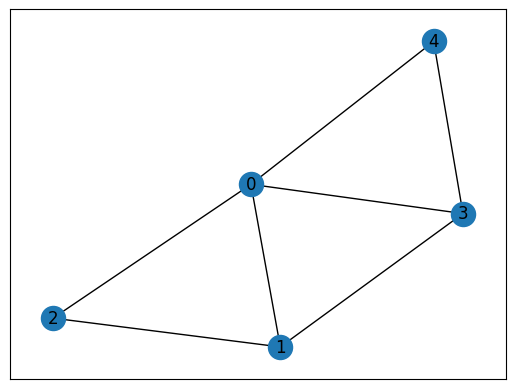

In [3]:
ng.new_node(mal=True, watch=w)

ng.plot_graph()

### Build up a small graph to add the chain to

In [4]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 0 0
2 Genesis Found
------------
Transaction number 1
Transaction Content 98
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>]
Tips 0 0
2 Genesis Found
------------
Transaction number 2
Transaction Content 41
Node Weight 2
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>]
Tips 2 1
Selected Different Transactions
------------
Transaction number 3
Transaction Content 42
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>]
Tips 2 2
Same non-genesis selected
New Tips 2 3
------------
Transaction number 4
Transaction Content 44
Node Weight 3
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>]
Tips 1 0
Selected Different Transactions
------------
Transaction number 5
Transaction Content 95
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>]
Tips 4 5
Selected Different Transac

Add the bad transaction and spam some tranasactions to make the chain.

In [5]:
ng.nodes[-1].issue_bad_transaction()
w.update()
ng.nodes[-1].spam_transactions(5)

Tips 1 1
Same non-genesis selected
New Tips 1 6
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>]
Tips 9
approved <Transaction 9>
approved <Transaction 9>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>]
Tips 9
approved <Transaction 10>
approved <Transaction 9>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>]
Tips 10
approved <Transaction 11>
approved <Transaction 10>
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>]
Tips 8
ap

Make sure the chain is recorded.

In [6]:
badNode = ng.nodes[-1]
print(badNode.chain)

[<Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>]


Add more nodes after adding the original chain.

In [7]:
for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

Tips 12 7
Selected Different Transactions
------------
Transaction number 15
Transaction Content 99
Node Weight 1
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>]
Tips 12 12
Same non-genesis selected
New Tips 12 7
------------
Transaction number 16
Transaction Content 11
Node Weight 2
Confirmed Status False
[<Genesis>, <Transaction 1>, <Transaction 2>, <Transaction 3>, <Transaction 4>, <Transaction 5>, <Transaction 6>, <Transaction 7>, <Transaction 8>, <Transaction 9>, <Transaction 10>, <Transaction 11>, <Transaction 12>, <Transaction 13>, <Transaction 14>, <Transaction 15>, <Transaction 16>]
Tips 8 16
Selected Different Transactions
------------
Transaction number 17
Transaction Content 19
Node Weight 1
Confirmed Status False
[<Genesis>, <Tra

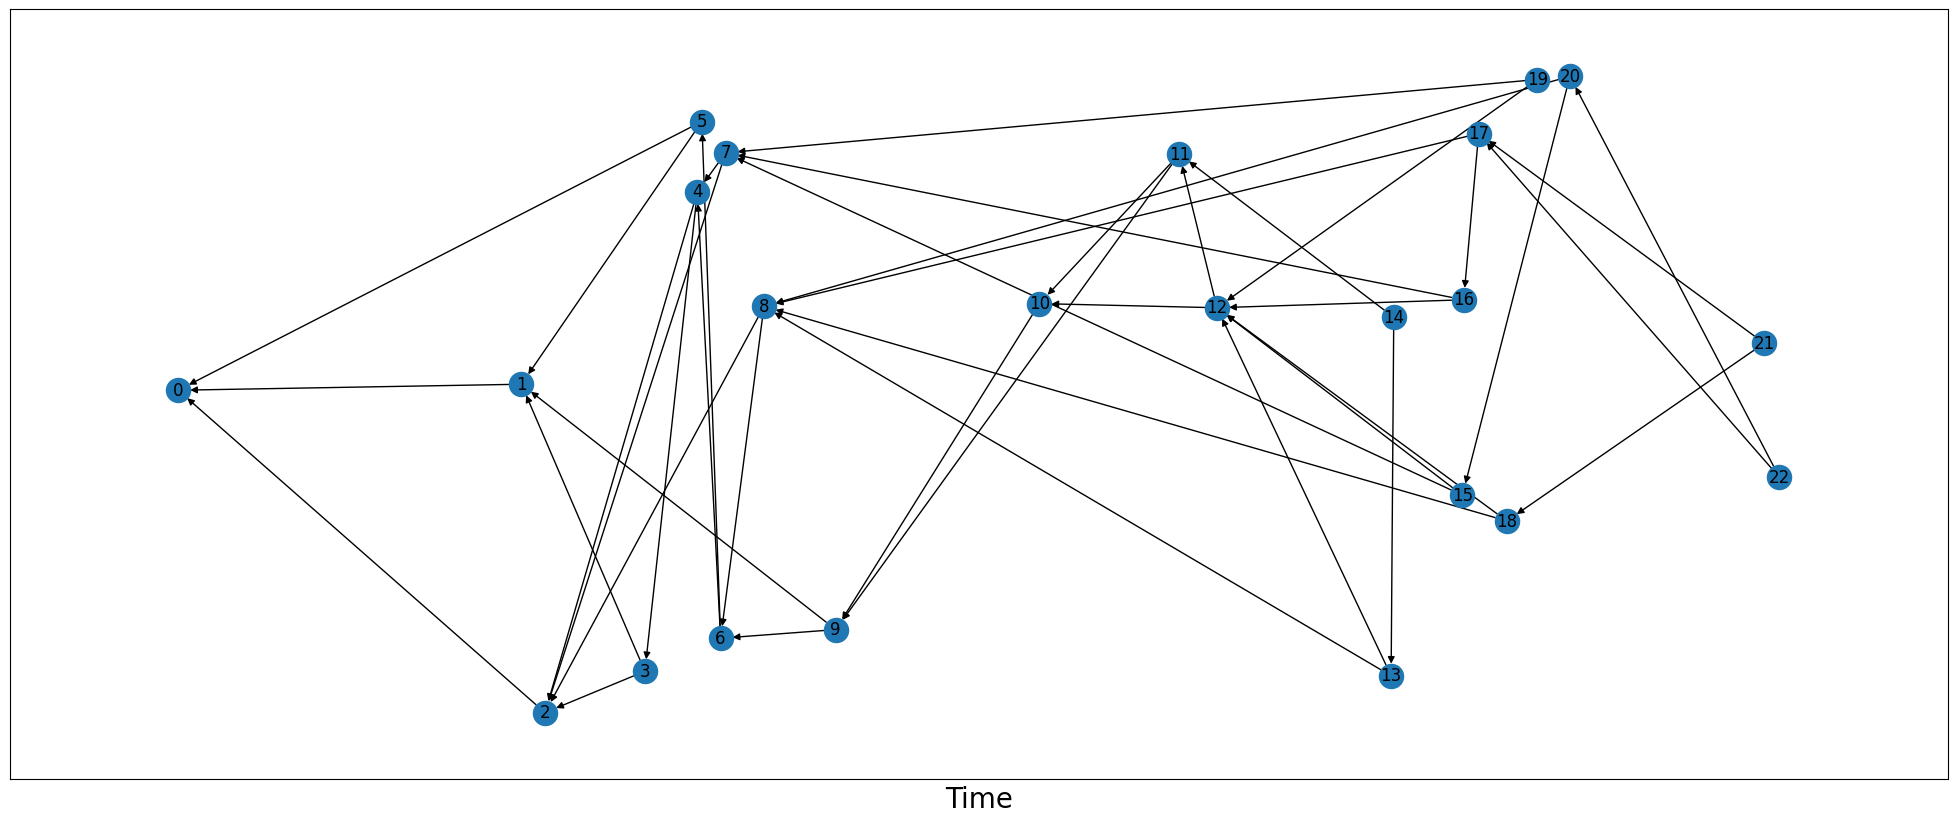

In [8]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[4, 4, 4, 4, 12, 12, 12, 16, 16, 16, 16, 16, 32, 34] [3.321112615591361, 4.349577945074941, 5.056298881971782, 5.246869633040978, 6.1259639568084685, 6.139215672069913, 6.4860565046121055, 6.492192446234294, 6.5680679955263175, 6.710312268247809, 6.864141493939227, 7.028916103336451, 8.009941620527258, 8.086707024818006]


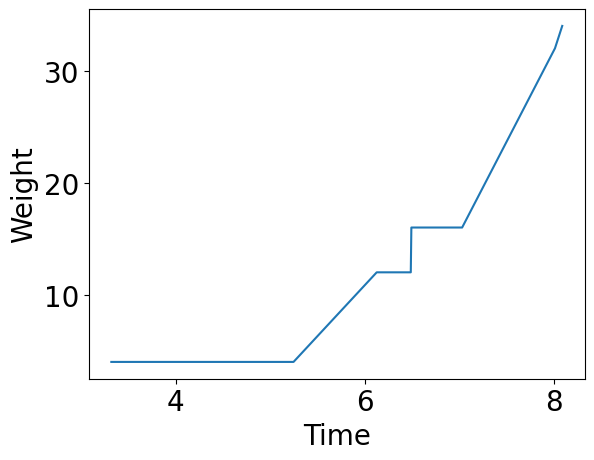

In [9]:
w.plot_cum_weight()